In [1]:
## Import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Create Theta Sampled
R = 2
Fs = 128
omega_not = (2*np.pi)*(R+2)
t_sampled = np.arange(0, 1, 1/Fs)
theta_sampled = (omega_not*t_sampled)%(2*np.pi)
# Caution ! Floating point errors
theta_sampled[theta_sampled<1e-10]=0
theta_sampled[theta_sampled>(2*np.pi - 1e-10)]=0
print(theta_sampled.shape)

(128,)


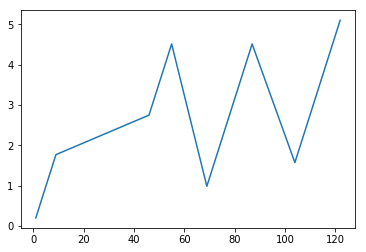

In [3]:
## Set Random Seed
np.random.seed(R+2)
n_train = 10
n_test = Fs-n_train
# Train Indices and Thetas
indices = np.array([k for k in range(Fs)])
train_indices = np.sort(np.random.choice(indices, n_train))
train_thetas = theta_sampled[train_indices]
# Test Indices and Thetas
test_indices = np.sort(np.array([index for index in indices if index not in train_indices]))
test_thetas = theta_sampled[test_indices]
# Plot
plt.plot(train_indices, train_thetas)

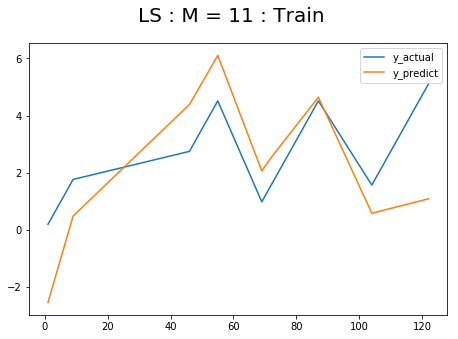

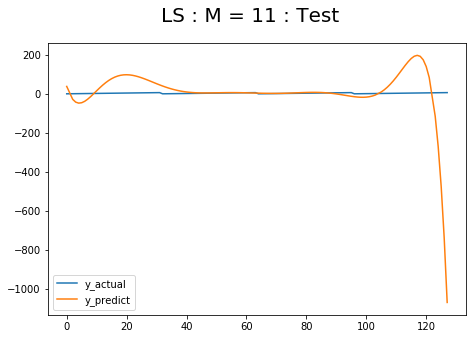

In [4]:
## Least Squares Solution
M = 11

# Create a N*(M+1) shaped numpy matrix from given indices
def create_X(n_indices, M) :
    X=[]
    for n in n_indices :
        X_n = [(n/Fs)**i for i in range(0, M+1)]
        X.append(X_n)
    return np.array(X)

X_train = create_X(train_indices, M)
X_test = create_X(test_indices, M)

# Create the N*1 shaped numpy array from given thetas
def create_Y(thetas) : 
    Y = np.reshape(thetas.T, list(thetas.T.shape)+[1])
    return Y
    
Y_train = create_Y(train_thetas)
Y_test = create_Y(test_thetas)

# # Create the weights using the least squared estimation
Least_Squared_Weights = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, Y_train))

# Create Y_hat_train and plot against Y_train
Y_hat_train = np.dot(X_train, Least_Squared_Weights)

figure = plt.figure(figsize=(7.5, 5))
figure.suptitle('LS : M = ' + str(M) + ' : Train', fontsize=20)

plt.plot(train_indices, Y_train)
plt.plot(train_indices, Y_hat_train)
plt.gca().legend(('y_actual', 'y_predict'))
# figure.savefig('LS_' + str(M) + '_Train.pdf', bbox_inches='tight')

# Create Y_hat_test and plot against Y_test
Y_hat_test = np.dot(X_test, Least_Squared_Weights)
figure = plt.figure(figsize=(7.5, 5))
figure.suptitle('LS : M = ' + str(M) + ' : Test', fontsize=20)

plt.plot(test_indices, Y_test)
plt.plot(test_indices, Y_hat_test)

plt.gca().legend(('y_actual', 'y_predict'))
# figure.savefig('LS_' + str(M) + '_Test.pdf', bbox_inches='tight')